In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from diffusion import solve_diffusion
from laxwen import get_nbr_timesteps, get_stepsizes, laxwen_stepper

## Task 1.1

In [2]:
courant = lambda N, M: (N+1)**2 / (M+1)

In [6]:
N, M = 50, 10000

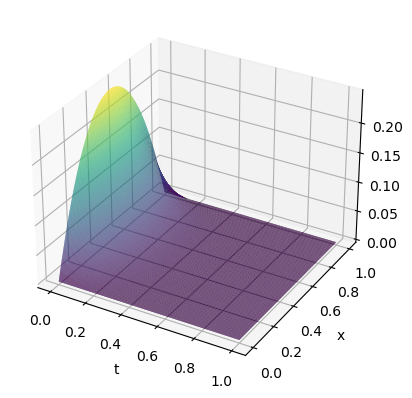

In [2]:
g = lambda x: -x*(x-1)
#g = lambda x: np.exp(-(x-0.5)**2)-np.exp(0.25)

tgrid, xgrid, approx = solve_diffusion(N, M, 1, g)
T, X = np.meshgrid(tgrid, xgrid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T, X, approx, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

In [7]:
courant(N,M)

0.26007399260073993

In [17]:
N, M = 25, 1000

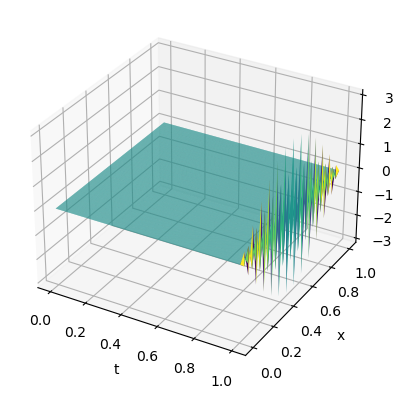

In [19]:
g = lambda x: -x*(x-1)

tgrid, xgrid, approx = solve_diffusion(N, M, 1, g)
T, X = np.meshgrid(tgrid, xgrid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T, X, approx, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

In [18]:
courant(N, M)

0.6753246753246753

## Task 1.2

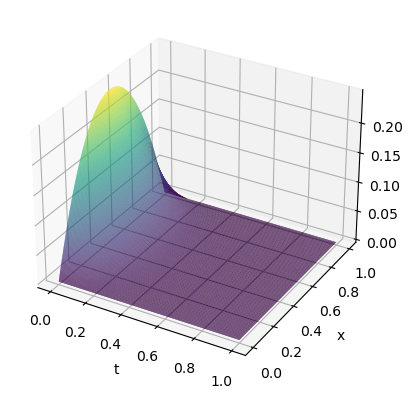

In [2]:
g = lambda x: -x*(x-1)

tgrid, xgrid, approx = solve_diffusion(50, 10000, 1, g, "implicit")
T, X = np.meshgrid(tgrid, xgrid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T, X, approx, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

In [8]:
N, M = 100, 100

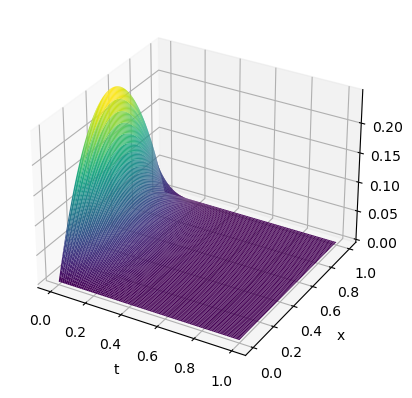

In [3]:
g = lambda x: -x*(x-1)

tgrid, xgrid, approx = solve_diffusion(100, 100, 1, g, "implicit")
T, X = np.meshgrid(tgrid, xgrid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T, X, approx, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

In [9]:
courant(N,M)

101.0

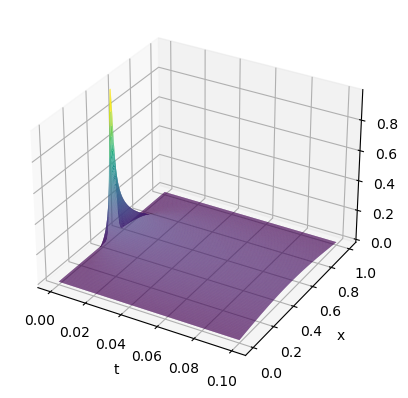

In [12]:
g = lambda x: np.exp(-1000*(x-0.5)**2)

tgrid, xgrid, approx = solve_diffusion(100, 1000, 0.1, g, "implicit")
T, X = np.meshgrid(tgrid, xgrid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T, X, approx, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()

## Task 2.1

100
277
(100, 277)


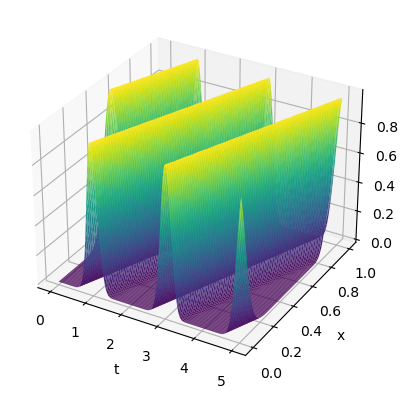

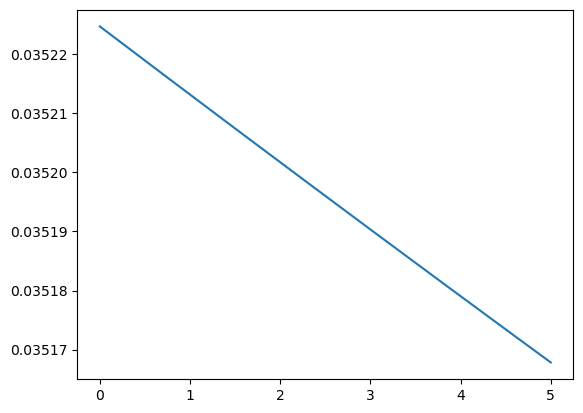

In [9]:
g = lambda x: np.exp(-100*(x-0.5)**2)
N = 100
xgrid = np.linspace(0,1,N)
amu = 0.9
a = 0.5
dt, dx = get_stepsizes(a, amu, N)
dt = amu * dx / a
u0 = g(xgrid)
M = get_nbr_timesteps(5, dt)
tgrid = np.linspace(0, 5, M)
u, norms = laxwen_stepper(u0, amu, M)
T, X = np.meshgrid(tgrid, xgrid)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T, X, u, rstride=1, cstride=1, cmap="viridis", edgecolor="none")
ax.set_xlabel("t")
ax.set_ylabel("x")
plt.show()
plt.figure(2)
plt.plot(tgrid, norms)
plt.show()